In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier;
from imblearn.ensemble import BalancedRandomForestClassifier;

import xgboost as xgb

In [119]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 320.0 kB/s eta 0:06:31
   ---------------------------------------- 0.0/124.9 MB 279.3 kB/s eta 0:07:28
   ---------------------------------------- 0.1/124.9 MB 521.8 kB/s eta 0:04:00
   ---------------------------------------- 0.2/124.9 MB 756.6 kB/s eta 0:02:45
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:53
   ---------------------------------------- 0.5/124.9 MB 1.7 MB/s eta 0:01:15
   ---------------------------------------- 0.8/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 0.8/124.9 MB 2.1 MB/s eta 0:00:59
   ------------------

In [3]:
fraud_data=pd.read_csv("fraud_data2.csv")
fraud_data
print(type(fraud_data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [5]:
fraud_data.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

In [6]:
fraud_data.shape

(23634, 16)

In [140]:
fraud_data.describe()

Transaction ID   Customer ID  Transaction Amount  Transaction Date  \
count    23634.000000  23634.000000        23634.000000           23634.0   
mean     11816.500000  11816.500000          229.367099            2024.0   
std       6822.692467   6822.692467          282.046669               0.0   
min          0.000000      0.000000           10.000000            2024.0   
25%       5908.250000   5908.250000           69.070000            2024.0   
50%      11816.500000  11816.500000          151.415000            2024.0   
75%      17724.750000  17724.750000          296.127500            2024.0   
max      23633.000000  23633.000000         9716.500000            2024.0   

       Payment Method  Product Category      Quantity  Customer Age  \
count    23634.000000      23634.000000  23634.000000  23634.000000   
mean         1.504697          2.004231      3.000550     34.560210   
std          1.119334          1.413968      1.419663     10.009471   
min          0.000000          0.000000      1.000000     -2.000000   
25%          1.000000          1.000000      2.000000     28.000000   
50%          2.000000          2.000000      3.000000     35.000000   
75%          3.000000          3.000000      4.000000     41.000000   
max          3.000000          4.000000      5.000000     73.000000   

       Customer Location   Device Used    IP Address  Shipping Address  \
count       23634.000000  23634.000000  23634.000000      23634.000000   
mean         7455.016671      0.996065  11816.500000      11816.500000   
std          4266.330576      0.816427   6822.692467       6822.692467   
min             0.000000      0.000000      0.000000          0.000000   
25%          3904.250000      0.000000   5908.250000       5908.250000   
50%          7365.500000      1.000000  11816.500000      11816.500000   
75%         11186.750000      2.000000  17724.750000      17724.750000   
max         14867.000000      2.000000  23633.000000      23633.000000   

       Billing Address  Is Fraudulent  Account Age Days  Transaction Hour  
count     23634.000000   23634.000000      23634.000000      23634.000000  
mean      11816.500000       0.051705        178.660531         11.266015  
std        6822.692467       0.221436        107.388682          6.980659  
min           0.000000       0.000000          1.000000          0.000000  
25%        5908.250000       0.000000         84.000000          5.000000  
50%       11816.500000       0.000000        178.000000         11.000000  
75%       17724.750000       0.000000        272.000000         17.000000  
max       23633.000000       1.000000        365.000000         23.000000

<Axes: xlabel='Transaction Amount', ylabel='Density'>

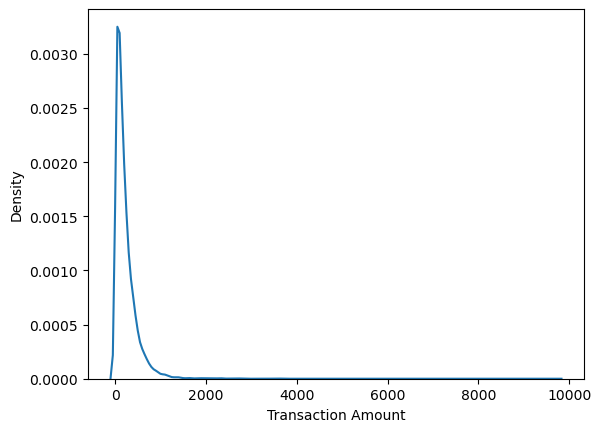

In [143]:
sns.kdeplot(fraud_data["Transaction Amount"])
#left skewed more outliers onright side

<Axes: xlabel='Customer Age', ylabel='Density'>

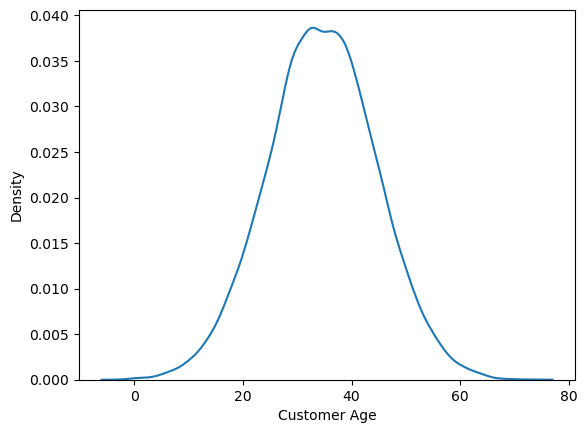

In [147]:
sns.kdeplot(fraud_data["Customer Age"])   #age is normally distributed thats y we are getting shape of bell curve

E:\anacondafolder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2300x2500 with 0 Axes>

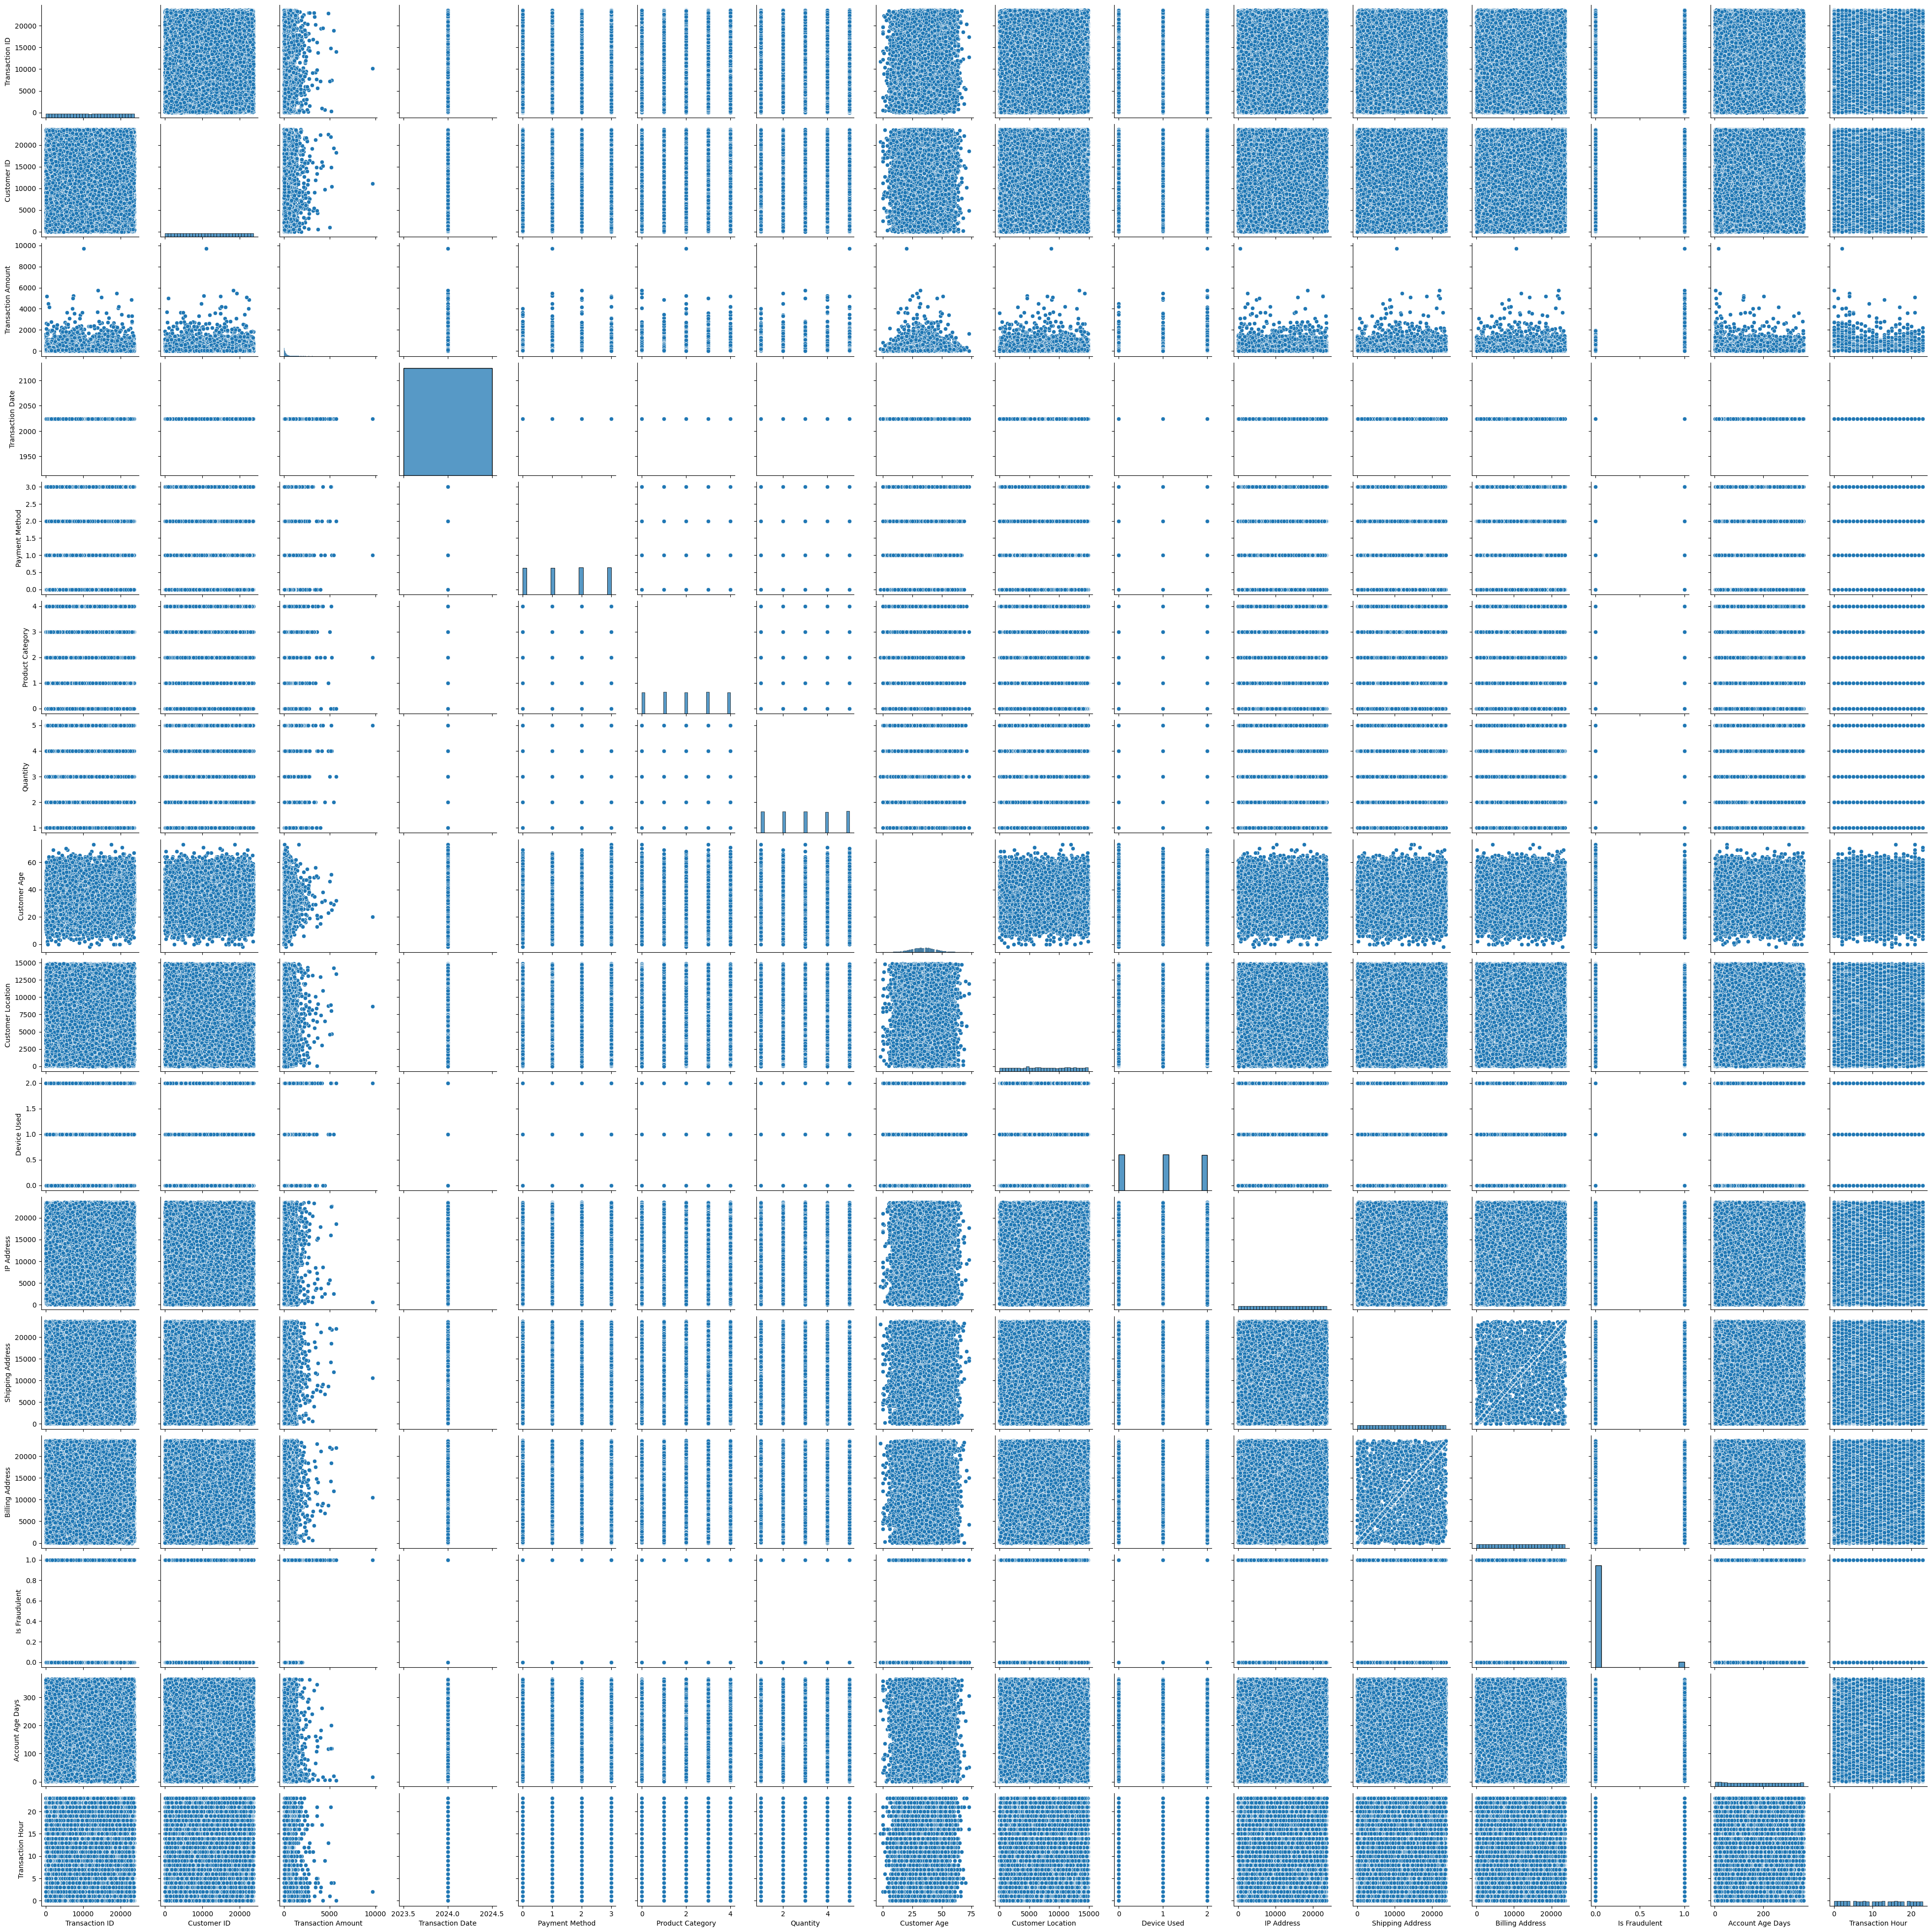

In [145]:
plt.figure(figsize=(23,25))
sns.pairplot(fraud_data)

In [7]:
#lets analyse the data and gain insights on data

In [8]:
fraud_transactions=fraud_data[fraud_data['Is Fraudulent']==1]
fraud_transactions

Transaction ID  \
36     01784f08-338e-461f-9685-6bcb507ab1f4   
115    45fa1005-7ae4-4183-96c3-18e9a078bfed   
169    59691090-4f05-416a-8c41-4ca68386cf19   
204    a858dc67-2d9a-48d9-b89a-1a14cefa26c6   
206    710aef60-ff0b-4767-8f0a-fa4a72044a3a   
...                                     ...   
23527  b3df5ff2-5cb7-4b86-a6d7-fd668f340961   
23552  4a2a6f53-d17b-41e2-b939-ea0d9dcfc87f   
23558  b8b477ce-5523-4e9b-91b3-6ede6b0f592d   
23561  c6b948d0-5255-464c-b15f-5146fcebacb8   
23601  5fa03dcf-4a2a-4e54-83cb-3f1e7f154dca   

                                Customer ID  Transaction Amount  \
36     d5010ab2-ceff-4617-b0bc-735409c64104              222.00   
115    ce489933-dd4f-455f-a2a2-fe576abf147c              307.37   
169    1a83682f-3737-4487-ba76-6e547b7af139               94.23   
204    516fc8a2-1acc-4af3-b75c-4f06608b50d8               70.93   
206    519d9b03-5049-47fa-bce9-15d159bf856f             1465.65   
...                                     ...                 ...   
23527  2dacabfc-18e1-48a7-a035-c208e2404598             2728.20   
23552  22c72792-0a22-4c24-9149-7b840ab1ced9              349.70   
23558  7d653291-3188-4de2-9088-d71990afdfc8              130.55   
23561  0258aa0a-1867-4e8f-ba69-86987c02db40               99.66   
23601  0c0d37d2-ad32-4a70-a673-bfcc7fb1e41c               26.85   

          Transaction Date Payment Method Product Category  Quantity  \
36     2024-03-25 19:30:56  bank transfer    home & garden         1   
115    2024-01-20 19:27:38  bank transfer    home & garden         2   
169    2024-03-11 14:30:07  bank transfer  health & beauty         4   
204    2024-02-21 21:02:11         PayPal    home & garden         4   
206    2024-02-21 15:04:45     debit card     toys & games         5   
...                    ...            ...              ...       ...   
23527  2024-02-18 00:12:47    credit card  health & beauty         3   
23552  2024-02-28 16:52:24  bank transfer         clothing         3   
23558  2024-03-01 00:41:23     debit card  health & beauty         4   
23561  2024-02-04 19:47:57  bank transfer  health & beauty         2   
23601  2024-01-02 09:48:09         PayPal  health & beauty         4   

       Customer Age Customer Location Device Used       IP Address  \
36               51          Robinton      tablet    138.3.124.205   
115              32   North Hollystad     desktop   223.202.233.44   
169              26        Scotthaven      tablet     52.12.114.19   
204              52       Stephenfort      tablet  172.110.189.188   
206              58         East John     desktop      7.31.74.212   
...             ...               ...         ...              ...   
23527            28    North Bethberg      mobile   31.101.191.145   
23552            11      New Lisatown      tablet     135.14.34.47   
23558            48          Lisafurt      tablet      9.71.243.87   
23561            34         South Jim      tablet   174.152.41.179   
23601            40        New Andrea     desktop   91.238.210.142   

                                        Shipping Address  \
36     5531 Sharp Squares Apt. 982\nNew Rachel, GU 76203   
115          52360 Bell Crossing\nEdwinchester, MH 89729   
169    17598 Vanessa Shores Suite 221\nNorth Ashley, ...   
204         0899 Jonathan Islands\nKellermouth, CO 07405   
206    8805 David Union Suite 461\nStaceyshire, MP 32513   
...                                                  ...   
23527  79696 Barnes Ways Apt. 765\nLake Rubenside, IL...   
23552  4291 Parsons Squares Suite 424\nDrewshire, FL ...   
23558  6072 Bruce Stravenue Suite 946\nLake Stephenvi...   
23561                           USS Nelson\nFPO AA 20648   
23601  45613 Anderson Curve\nNorth Christieport, NY 3...   

                                         Billing Address  Is Fraudulent  \
36     5531 Sharp Squares Apt. 982\nNew Rachel, GU 76203              1   
115          52360 Bell Crossing\nEdwinchester, MH 89729              1   
169    

In [9]:
fraud_transactions.shape

#out of 23k transcations only 1222 are fraudlent transcations that means data is imbalanced

(1222, 16)

In [10]:
fraud_transactions["Payment Method"].value_counts()  #The usage of payment method to pay for transactions is almost same for all payment methods

Payment Method
bank transfer    326
PayPal           310
credit card      301
debit card       285
Name: count, dtype: int64

<Axes: xlabel='Payment Method', ylabel='count'>

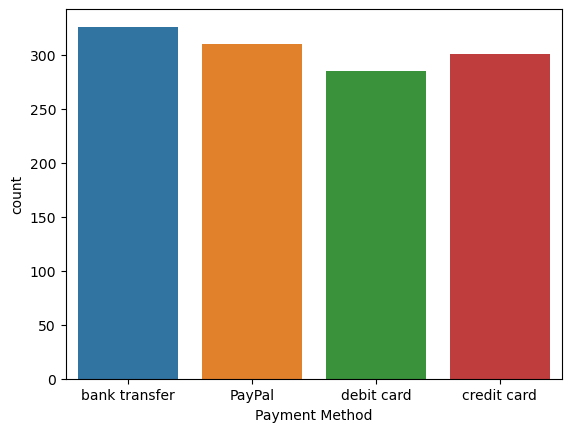

In [11]:
sns.countplot(x="Payment Method", data=fraud_transactions)  #So no need to include this payment method feature in predictive analysis of fraud transaction

<Axes: xlabel='Product Category', ylabel='count'>

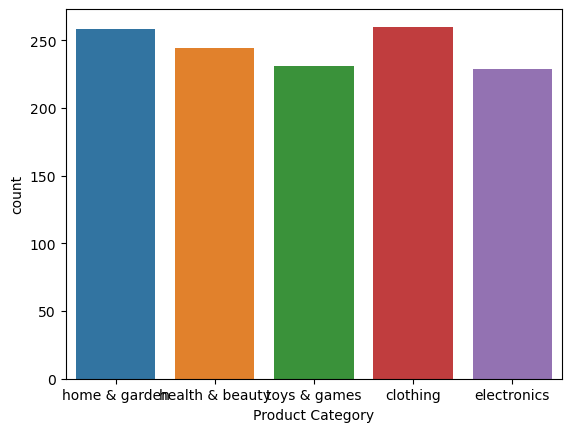

In [12]:
sns.countplot(x="Product Category", data=fraud_transactions)  #almost in all produdct categories fraud happened amount is same

In [13]:
legitimate_transactions=fraud_data[fraud_data["Is Fraudulent"]==0]
legitimate_transactions

Transaction ID  \
0      c12e07a0-8a06-4c0d-b5cc-04f3af688570   
1      7d187603-7961-4fce-9827-9698e2b6a201   
2      f2c14f9d-92df-4aaf-8931-ceaf4e63ed72   
3      e9949bfa-194d-486b-84da-9565fca9e5ce   
4      7362837c-7538-434e-8731-0df713f5f26d   
...                                     ...   
23629  d8b7171f-bdd9-479c-b98b-396c621aebfe   
23630  0fd12cf3-c641-4499-8de1-15dc4555cb0c   
23631  649680d3-a684-44cb-95bf-9b454c3aa86d   
23632  c10dbb08-28fc-4ec1-9850-d4e98d2b9640   
23633  23e3c107-f2fc-48c2-abbc-7b809bf6f102   

                                Customer ID  Transaction Amount  \
0      8ca9f102-02a4-4207-ab63-484e83a1bdf0               42.32   
1      4d158416-caae-4b09-bd5b-15235deb9129              301.34   
2      ccae47b8-75c7-4f5a-aa9e-957deced2137              340.32   
3      b04960c0-aeee-4907-b1cd-4819016adcef               95.77   
4      de9d6351-b3a7-4bc7-9a55-8f013eb66928               77.45   
...                                     ...                 ...   
23629  98a3d94c-dc9a-4525-b273-e6ffe54cc5a4               53.73   
23630  b3429f52-8b27-46b5-914c-4accd989edb4               47.42   
23631  066e25c9-4420-4224-bc3f-1a462708090e             1045.23   
23632  cde96e9c-f562-4b8c-8fa8-f356f474232b               34.25   
23633  d8d7a64e-8419-4421-910a-a7cf709a900b               85.03   

          Transaction Date Payment Method Product Category  Quantity  \
0      2024-03-24 23:42:43         PayPal      electronics         1   
1      2024-01-22 00:53:31    credit card      electronics         3   
2      2024-01-22 08:06:03     debit card     toys & games         5   
3      2024-01-16 20:34:53    credit card      electronics         5   
4      2024-01-16 15:47:23    credit card         clothing         5   
...                    ...            ...              ...       ...   
23629  2024-01-26 16:25:05         PayPal     toys & games         5   
23630  2024-02-25 17:03:26    credit card         clothing         4   
23631  2024-03-28 23:46:47  bank transfer  health & beauty         1   
23632  2024-02-09 11:29:18     debit card    home & garden         2   
23633  2024-01-23 02:46:52    credit card         clothing         4   

       Customer Age    Customer Location Device Used       IP Address  \
0                40      East Jameshaven     desktop    110.87.246.85   
1                35             Kingstad      tablet    14.73.104.153   
2                29           North Ryan     desktop      67.58.94.93   
3                45           Kaylaville      mobile  202.122.126.216   
4                42  North Edwardborough     desktop     96.77.232.76   
...             ...                  ...         ...              ...   
23629            32          Rebeccafurt      tablet   173.97.197.128   
23630            41          Nataliefort     desktop    133.222.22.48   
23631             9    East Shannonville      tablet  206.133.237.168   
23632            39          Lake Nicole      mobile   16.204.137.130   
23633            38             Holtport      tablet  116.188.254.162   

                                        Shipping Address  \
0      5399 Rachel Stravenue Suite 718\nNorth Blakebu...   
1            5230 Stephanie Forge\nCollinsbury, PR 81853   
2                    195 Cole Oval\nPort Larry, IA 58422   
3             7609 Cynthia Square\nWest Brenda, NV 23016   
4      2494 Robert Ramp Suite 313\nRobinsonport, AS 5...   
...                                                  ...   
23629                         USNV Clayton\nFPO AE 82639   
23630  9288 Patricia Cape Apt. 527\nMelissaton, IL 38543   
23631  3015 Elizabeth Summit Suite 819\nEast Joelfort...   
23632             531 Brittany Pike\nNew Stacy, OR 87952   
23633           289 Adams Wells\nWest Joeltown, LA 69190   

                                         Billing Address  Is Fraudulent  \
0      5399 Rachel Stravenue Suite 718\nNorth Blakebu...              0   
1            5230 Stephanie Forge\nCollinsbury

In [14]:
legitimate_transactions.describe()

Transaction Amount      Quantity  Customer Age  Is Fraudulent  \
count        22412.000000  22412.000000  22412.000000        22412.0   
mean           211.226000      3.002320     34.548947            0.0   
std            202.803353      1.419597     10.004763            0.0   
min             10.000000      1.000000     -2.000000            0.0   
25%             67.885000      2.000000     28.000000            0.0   
50%            148.205000      3.000000     35.000000            0.0   
75%            287.017500      4.000000     41.000000            0.0   
max           1980.940000      5.000000     73.000000            0.0   

       Account Age Days  Transaction Hour  
count      22412.000000      22412.000000  
mean         182.232911         11.465242  
std          105.821757          6.925433  
min            1.000000          0.000000  
25%           90.000000          5.000000  
50%          182.000000         11.000000  
75%          274.000000         17.000000  
max          365.000000         23.000000

In [15]:
fraud_transactions.describe()

Transaction Amount     Quantity  Customer Age  Is Fraudulent  \
count         1222.000000  1222.000000   1222.000000         1222.0   
mean           562.082561     2.968085     34.766776            1.0   
std            817.306472     1.421076     10.097337            0.0   
min             10.060000     1.000000      5.000000            1.0   
25%            100.500000     2.000000     28.000000            1.0   
50%            251.025000     3.000000     34.500000            1.0   
75%            651.645000     4.000000     42.000000            1.0   
max           9716.500000     5.000000     73.000000            1.0   

       Account Age Days  Transaction Hour  
count       1222.000000       1222.000000  
mean         113.141571          7.612111  
std          114.644129          6.983902  
min            1.000000          0.000000  
25%           17.000000          2.000000  
50%           52.500000          5.000000  
75%          208.750000         13.000000  
max          365.000000         23.000000

(array([1.4065e+04, 5.1850e+03, 1.9340e+03, 7.6500e+02, 2.8000e+02,
        1.2500e+02, 3.6000e+01, 1.5000e+01, 2.0000e+00, 5.0000e+00]),
 array([  10.   ,  207.094,  404.188,  601.282,  798.376,  995.47 ,
        1192.564, 1389.658, 1586.752, 1783.846, 1980.94 ]),
 <BarContainer object of 10 artists>)

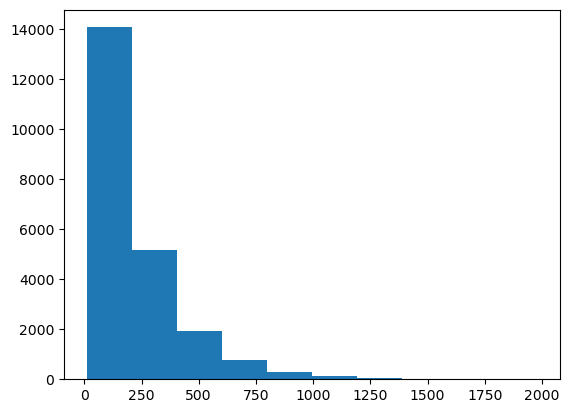

In [16]:
plt.hist(legitimate_transactions["Transaction Amount"])

(array([1.014e+03, 1.250e+02, 5.800e+01, 1.200e+01, 6.000e+00, 6.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  10.06 ,  980.704, 1951.348, 2921.992, 3892.636, 4863.28 ,
        5833.924, 6804.568, 7775.212, 8745.856, 9716.5  ]),
 <BarContainer object of 10 artists>)

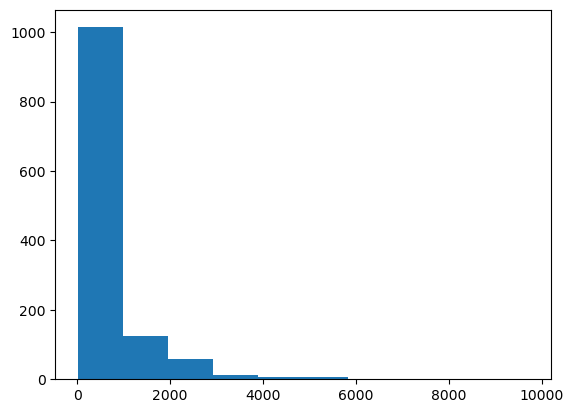

In [17]:
plt.hist(fraud_transactions["Transaction Amount"])

In [18]:
fraud_transactions[fraud_transactions["Transaction Amount"]>4000]

Transaction ID  \
1126   07295ff7-2b4a-4eaf-bbcb-2cca563a7bc1   
2200   50d29b1e-7702-45a5-a211-883b08ef3714   
6706   d15fec56-29d1-437f-bc09-95d52bf444b2   
6859   f7611f68-c2ea-455e-af7d-cb3e0065ba32   
8718   0ace9836-15e9-473c-a8d7-654e470b95dd   
8895   cc928714-de9e-4abb-8409-102c75abb2ed   
13740  6e97ba1f-2013-4c6e-a57c-d868c20ef291   
14541  03d6ba58-cca5-47d9-85a4-bb3edc2eecc9   
17889  981b50e1-62e3-4823-955a-7f8b8c108bdf   
18890  a0df849d-3c82-43c2-b224-cbfa42583f53   
20164  4eae280f-b9d5-409c-bd37-fd1c1dca9cfc   
21810  d3263b2e-bf4d-4ffe-8ea9-d4b2d68e4f5a   
22208  4e37c818-9710-4ee8-883d-50daacfe0eb8   

                                Customer ID  Transaction Amount  \
1126   6976bc2d-cc7c-4d9a-b0d6-3dd0bfa6cd2d             4465.45   
2200   7066ed18-00a8-46ca-a92b-dace1dfd72d3             5244.05   
6706   a059323b-dfa8-4487-87cc-2891343bca30             4046.90   
6859   f32d999b-5962-4b13-a2d6-1ec8f7ebea21             4851.15   
8718   af313160-e6ba-4850-9de3-8a1b0d5f73be             4139.45   
8895   d0cbd989-590b-4605-b3ba-baf375e914e2             5465.95   
13740  78066499-aa62-453f-88f9-46896a8ce3e5             9716.50   
14541  a174c9c9-3c07-40e1-a281-bc4f6d4d9f3a             5180.30   
17889  c69cdc99-09e0-4dc0-b535-62ccd9c85a9c             5725.00   
18890  ec57ba4f-1413-41e4-9081-b6fea3256796             5092.45   
20164  0a6d559f-f71c-4881-b3f9-ee9fa1c06999             5020.55   
21810  a4484e9b-997e-4165-9d7d-65e5ae65d6e0             4231.50   
22208  f22788c4-539e-4d63-a459-677e888c59f4             4012.60   

          Transaction Date Payment Method Product Category  Quantity  \
1126   2024-03-01 09:49:57  bank transfer  health & beauty         2   
2200   2024-03-12 22:49:37  bank transfer  health & beauty         4   
6706   2024-04-05 00:26:08  bank transfer         clothing         5   
6859   2024-01-05 13:11:52    credit card      electronics         4   
8718   2024-03-04 17:48:04    credit card     toys & games         4   
8895   2024-03-09 09:56:04  bank transfer         clothing         2   
13740  2024-01-13 08:01:10  bank transfer  health & beauty         5   
14541  2024-03-24 01:11:56     debit card     toys & games         5   
17889  2024-03-22 16:24:06    credit card         clothing         3   
18890  2024-01-12 21:47:15     debit card         clothing         4   
20164  2024-02-05 11:02:39    credit card    home & garden         3   
21810  2024-01-27 16:14:53     debit card     toys & games         5   
22208  2024-03-02 10:11:57         PayPal  health & beauty         1   

       Customer Age  Customer Location Device Used       IP Address  \
1126             32           Marctown     desktop    12.68.220.131   
2200             25        Jonathonton      tablet   91.238.141.129   
6706             20      New Christina      tablet  131.154.163.247   
6859             23  North Gregchester      mobile   140.81.173.206   
8718             31   East Theresaview      tablet   114.235.250.42   
8895             29         West Maria      mobile    12.251.232.91   
13740            20     North Debraton      tablet  103.214.156.166   
14541            51         New Nicole      tablet     90.84.104.37   
17889            32         Wagnertown      tablet      57.16.39.46   
18890            30   North Josephberg      tablet    33.37.124.226   
20164            46        Jonathanton      mobile    148.108.98.57   
21810            38     Rasmussenmouth     desktop  173.185.248.197   
22208            15        Suttonville      tablet   50.156.151.103   

                                        Shipping Address  \
1126            3260 Haynes Common\nLake Frank, AS 19661   
2200                    PSC 7449, Box 4406\nAPO AP 94591   
6706                    PSC 1077, Box 2726\nAPO AP 50921   
6859   41235 Nancy Cove Apt. 264\nHarrisonhaven, FM 7...   
8718   415 Donna Trafficway Suite 408\nEast Patricia,...   
8895            571 Katherine Ford\nNew Steven, OR 18541   
13740  

In [19]:
legitimate_transactions[legitimate_transactions["Transaction Amount"]>1900]


Transaction ID  \
11017  a6059687-31c3-43ce-8f69-23be5a7a473b   
14560  0663645f-65ca-4a79-91c3-e36f75f98ce7   
22717  b3cd5ba8-b63b-4f4a-89a0-08d62d0f85cd   

                                Customer ID  Transaction Amount  \
11017  3bee976f-f5c2-43c9-8aa8-14b4923f8820             1919.70   
14560  94561f3c-8c54-4742-93cf-2e45361b2fc8             1980.94   
22717  4cf91193-e939-4f18-b89b-c83f944c2d92             1910.49   

          Transaction Date Payment Method Product Category  Quantity  \
11017  2024-02-09 15:42:34         PayPal     toys & games         5   
14560  2024-03-05 07:49:14    credit card      electronics         3   
22717  2024-03-31 09:14:50    credit card    home & garden         3   

       Customer Age Customer Location Device Used       IP Address  \
11017            40   Port Dylanville      tablet  199.110.255.229   
14560            31         East Ryan     desktop  107.224.253.219   
22717            26        Harmonberg     desktop    71.193.62.213   

                                        Shipping Address  \
11017  4991 Walker Springs Suite 538\nNew Jeremy, WY ...   
14560           5464 Rachel Shoal\nEast Cheryl, NE 39218   
22717                   Unit 5089 Box 8677\nDPO AA 22867   

                                         Billing Address  Is Fraudulent  \
11017  4991 Walker Springs Suite 538\nNew Jeremy, WY ...              0   
14560           5464 Rachel Shoal\nEast Cheryl, NE 39218              0   
22717                   Unit 5089 Box 8677\nDPO AA 22867              0   

       Account Age Days  Transaction Hour  
11017               363                15  
14560               320                 7  
22717               245                 9

In [20]:
fraud_data["Transaction ID"].value_counts()

Transaction ID
c12e07a0-8a06-4c0d-b5cc-04f3af688570    1
791956fa-e129-44ad-90ff-29a9b8d2b180    1
718a923c-f03f-48ea-853d-406f2081205b    1
e21105ab-da57-4d1e-9cdc-4f393c8a8b1a    1
adda6e73-96b3-4d0b-9b83-c92772665882    1
                                       ..
a0912580-1c20-4851-9504-ea68a6cb013b    1
4af822b8-54cb-4b2f-af9c-fcee949b5c5a    1
0bc42e18-9401-4fd0-8dba-82ffcaccfbb6    1
605ed93a-5e2e-4edd-ad42-0cba852f801a    1
23e3c107-f2fc-48c2-abbc-7b809bf6f102    1
Name: count, Length: 23634, dtype: int64

In [21]:
fraud_data["Customer ID"].value_counts()

Customer ID
8ca9f102-02a4-4207-ab63-484e83a1bdf0    1
1f223d4f-3885-414e-a6a7-7587ddd758c1    1
b7fd700e-7784-4b61-a928-13a71d635830    1
04f3a745-d3ab-4f71-9105-147abb06e643    1
212ad010-e30c-4845-859d-efbbce5ce8e0    1
                                       ..
40d03f88-2c94-4846-afe9-39797ae4061e    1
57b51c1d-ac26-4a47-ab3b-7e0db9be08fc    1
df55a603-daa8-465a-9c85-999764ca7903    1
651423fa-0d76-49a6-a067-6e263bded39b    1
d8d7a64e-8419-4421-910a-a7cf709a900b    1
Name: count, Length: 23634, dtype: int64

In [22]:
legitimate_transactions[legitimate_transactions["Customer Age"]>50]

Transaction ID  \
11     2a2a4e1d-0889-49e8-8a0e-9045072665f9   
12     c2d10730-a7bb-44e6-a2a3-357e8d029259   
45     08cf64b1-d4a8-460a-89b1-91abfdd9fc80   
136    ec12c962-abef-484f-8f61-d960736abb93   
175    494b3468-8202-4c34-8ba9-d1f814723361   
...                                     ...   
23546  3cb0cd5a-62fd-4f3a-9247-7e5732a33c52   
23565  457f70d1-9bc8-4ef4-bed1-3d24a68015bf   
23569  6e8a9402-1e1a-4a9d-811f-f00d778dc25b   
23574  914bd281-af86-40ca-b587-352901c3fc15   
23603  e521de95-7e29-466a-beaa-3263c709aa1a   

                                Customer ID  Transaction Amount  \
11     21dc4cc4-2ffe-4b64-862c-8858950615fc              141.09   
12     1dce876f-821a-4af1-95a3-2e270774e421               95.13   
45     641384b7-df4a-4d78-863b-227c32b5cb28               32.75   
136    b52b1674-7ff5-4331-aa4b-46248af0b5a2               27.84   
175    30b1a14d-cf3f-427f-a595-986bea0bb738              511.29   
...                                     ...                 ...   
23546  d28a1232-740e-4d10-82a1-ba07092b5826              412.57   
23565  7fe2fc2e-e44e-41ab-8e6b-027ff26b6b84               18.09   
23569  4cbf71d7-e638-4b9d-b337-418090bc837b              783.54   
23574  056e7f7c-89be-4e25-a6bd-639f2d0cd8b5              213.46   
23603  0ff1255f-2b40-40ce-923f-2f74c3bb3f27              135.69   

          Transaction Date Payment Method Product Category  Quantity  \
11     2024-03-30 00:23:22         PayPal  health & beauty         1   
12     2024-01-25 19:42:25    credit card      electronics         4   
45     2024-03-07 11:33:27         PayPal     toys & games         5   
136    2024-04-03 17:41:37     debit card    home & garden         2   
175    2024-02-18 17:13:24         PayPal         clothing         5   
...                    ...            ...              ...       ...   
23546  2024-02-22 10:54:37  bank transfer     toys & games         1   
23565  2024-01-06 05:54:10    credit card     toys & games         3   
23569  2024-03-19 04:59:01     debit card         clothing         1   
23574  2024-02-29 05:24:56     debit card  health & beauty         5   
23603  2024-01-17 16:21:41  bank transfer     toys & games         1   

       Customer Age  Customer Location Device Used       IP Address  \
11               53   Lake Cynthiafurt      mobile   68.178.249.254   
12               51  New Elizabethbury      mobile   146.189.28.134   
45               60       Jaredborough     desktop    153.40.34.108   
136              61       Jonathanstad      tablet     11.118.85.44   
175              58          Hobbsland      tablet    221.216.74.57   
...             ...                ...         ...              ...   
23546            53        East Ronald     desktop  151.175.130.140   
23565            56  New Elizabethside      mobile   109.50.252.103   
23569            52        Jacksontown     desktop   122.238.88.111   
23574            57         East Kevin     desktop   75.212.108.141   
23603            60      Lake Annebury      tablet    67.39.242.100   

                                        Shipping Address  \
11                 869 Rivera Plaza\nPaulburgh, AK 30060   
12          7565 Patrick Radial\nSamanthashire, HI 61678   
45     0185 Jackson Parkways Suite 087\nSouth Felicia...   
136    4671 Kim Terrace Suite 411\nJeffreybury, GA 30578   
175     338 Patricia Roads Apt. 221\nJoanhaven, WV 70368   
...                                                  ...   
23546  6872 Macias Squares Apt. 806\nEast Richard, UT...   
23565  5216 Williams Heights Suite 378\nLindseyfurt, ...   
23569  634 Erin Heights Apt. 436\nChristianside, MI 1...   
23574  7695 Lewis Drive Suite 369\nNew Billyberg, WI ...   
23603                   Unit 9344 Box 0959\nDPO AE 93489   

                                         Billing Address  Is Fraudulent  \
11                 869 Rivera Plaza\nPaulburgh, AK 30060              0   
12     007 Williams Tunnel Apt. 174\nLake Dylan, MN 2...              

In [23]:
fraud_transactions[fraud_transactions["Customer Age"]>50]   

Transaction ID  \
36     01784f08-338e-461f-9685-6bcb507ab1f4   
204    a858dc67-2d9a-48d9-b89a-1a14cefa26c6   
206    710aef60-ff0b-4767-8f0a-fa4a72044a3a   
367    5988ae1f-0236-4d9b-b083-cb02b0293294   
476    6438f9b6-249d-44d9-a007-db80b3433bea   
...                                     ...   
22439  7c2ec10a-feaa-4c75-8807-0f298f37cb19   
22941  1d765c38-5ba4-4124-a117-1a1956f7a732   
23106  654ee860-22bf-455d-9485-8c2efde5b0fc   
23313  1a9ef5ad-36e8-42c5-b866-03fa8728b199   
23380  a545b8e9-3491-46bb-a9b2-14a3f502e84d   

                                Customer ID  Transaction Amount  \
36     d5010ab2-ceff-4617-b0bc-735409c64104              222.00   
204    516fc8a2-1acc-4af3-b75c-4f06608b50d8               70.93   
206    519d9b03-5049-47fa-bce9-15d159bf856f             1465.65   
367    27bd6908-8178-4c96-ad0d-472f525b1267              194.84   
476    81c63e55-e123-4465-8862-cc1119581419             3435.15   
...                                     ...                 ...   
22439  3852a9cd-bc5d-4699-a7a3-9c4f7e093471              491.42   
22941  4ce5a814-710b-4500-b0b0-046eb837cd92              248.95   
23106  95956fb5-a6f0-49e5-be8b-21afc9451226               55.14   
23313  16930458-dddd-4258-b221-e168fbd15d7f              199.28   
23380  5e69d30d-0958-49fc-823c-91361d290292              496.98   

          Transaction Date Payment Method Product Category  Quantity  \
36     2024-03-25 19:30:56  bank transfer    home & garden         1   
204    2024-02-21 21:02:11         PayPal    home & garden         4   
206    2024-02-21 15:04:45     debit card     toys & games         5   
367    2024-01-31 19:46:18    credit card     toys & games         2   
476    2024-02-09 22:15:20         PayPal     toys & games         2   
...                    ...            ...              ...       ...   
22439  2024-02-06 18:21:32    credit card         clothing         3   
22941  2024-03-30 03:03:12         PayPal         clothing         2   
23106  2024-01-28 19:33:26     debit card      electronics         1   
23313  2024-03-12 10:27:44    credit card      electronics         2   
23380  2024-01-03 10:51:05     debit card  health & beauty         2   

       Customer Age  Customer Location Device Used       IP Address  \
36               51           Robinton      tablet    138.3.124.205   
204              52        Stephenfort      tablet  172.110.189.188   
206              58          East John     desktop      7.31.74.212   
367              54           Tonyland      mobile    220.193.82.82   
476              56     New Jamiehaven      tablet   172.225.78.229   
...             ...                ...         ...              ...   
22439            55       Cardenasland      mobile    62.241.94.169   
22941            53  North Jessicaport      tablet   93.101.124.141   
23106            54    South Alexander     desktop     67.108.81.66   
23313            53      New Jamesbury      tablet     1.116.25.184   
23380            56      East Veronica      tablet  208.253.168.151   

                                        Shipping Address  \
36     5531 Sharp Squares Apt. 982\nNew Rachel, GU 76203   
204         0899 Jonathan Islands\nKellermouth, CO 07405   
206    8805 David Union Suite 461\nStaceyshire, MP 32513   
367    18400 Elizabeth Station Suite 210\nJenkinsfort...   
476        8332 Dawn Rue Suite 044\nAngelburgh, NE 92790   
...                                                  ...   
22439  69317 Hughes Light Suite 705\nAtkinsfurt, WI 8...   
22941               131 Morse Bypass\nDukeview, UT 29841   
23106           6198 Franklin Inlet\nWest Tina, NE 70677   
23313    70953 Griffin Circles\nDeborahchester, NH 20735   
23380         07175 Cristian View\nCynthiaside, WV 40113   

                                         Billing Address  Is Fraudulent  \
36     5531 Sharp Squares Apt. 982\nNew Rachel, GU 76203              1   
204         0899 Jonathan Islands\nKellermouth, CO 07405              

(array([2832., 1900., 1850., 2804., 1842., 1883., 2824., 1828., 1887.,
        2762.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

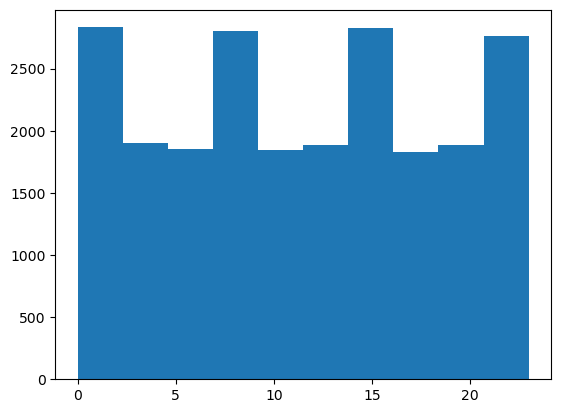

In [24]:
plt.hist(x="Transaction Hour",data=legitimate_transactions)

(array([355., 215., 159.,  87.,  59.,  57.,  89.,  52.,  60.,  89.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

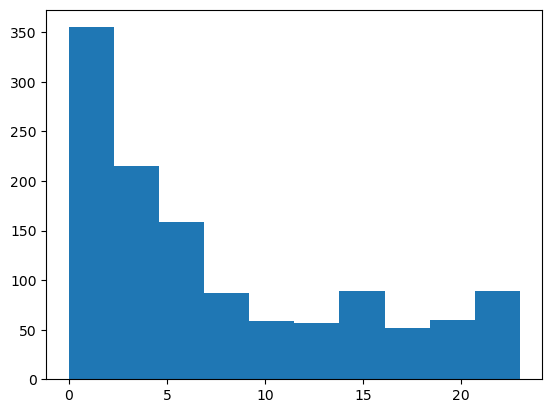

In [25]:
plt.hist(x="Transaction Hour",data=fraud_transactions)

<Axes: xlabel='Customer Location', ylabel='count'>

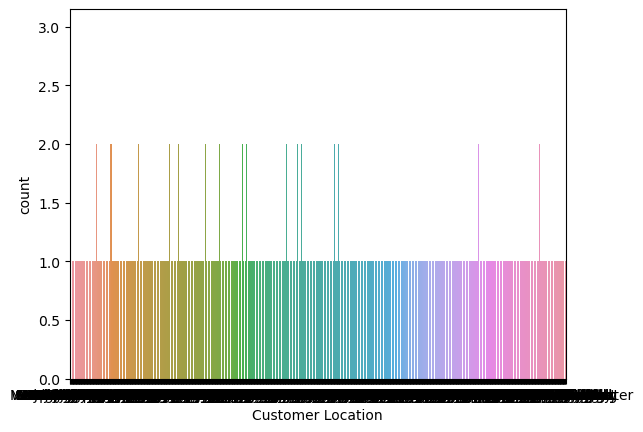

In [26]:
sns.countplot(x="Customer Location",data=fraud_transactions)

In [27]:
fraud_transactions["Customer Location"].value_counts()

Customer Location
South Brian          3
West Stephen         3
Port Christopher     3
Reyesmouth           3
North Brian          3
                    ..
South Manuel         1
East Reneeburgh      1
South Brittany       1
North Jeffreyport    1
New Andrea           1
Name: count, Length: 1167, dtype: int64

In [28]:
fraud_transactions["Shipping Address"].value_counts()

Shipping Address
5531 Sharp Squares Apt. 982\nNew Rachel, GU 76203        1
0031 Walls Mission Apt. 906\nPort Davidberg, HI 90058    1
6675 Blanchard Island\nZacharyville, ID 02503            1
07515 Tracy Radial Apt. 637\nNorth Erin, FL 11055        1
921 Howe Extension\nPort Bonnie, MO 57084                1
                                                        ..
5534 Henry Corner\nNorth Patrick, FM 55838               1
5221 Rodriguez Branch Apt. 619\nAndrewport, PR 98896     1
642 Sean Stravenue\nWatkinsland, PA 60698                1
1991 Nathaniel Brooks Apt. 560\nNew Sean, SC 40855       1
45613 Anderson Curve\nNorth Christieport, NY 30920       1
Name: count, Length: 1222, dtype: int64

In [29]:
fraud_transactions["Billing Address"].value_counts()

Billing Address
5531 Sharp Squares Apt. 982\nNew Rachel, GU 76203        1
0031 Walls Mission Apt. 906\nPort Davidberg, HI 90058    1
6675 Blanchard Island\nZacharyville, ID 02503            1
07515 Tracy Radial Apt. 637\nNorth Erin, FL 11055        1
921 Howe Extension\nPort Bonnie, MO 57084                1
                                                        ..
5534 Henry Corner\nNorth Patrick, FM 55838               1
USNS Hall\nFPO AE 32649                                  1
642 Sean Stravenue\nWatkinsland, PA 60698                1
1991 Nathaniel Brooks Apt. 560\nNew Sean, SC 40855       1
45613 Anderson Curve\nNorth Christieport, NY 30920       1
Name: count, Length: 1222, dtype: int64

In [68]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [69]:
for i in range(0,len(fraud_data.columns)):
    print(fraud_data[i])

KeyError: 0

In [71]:
len(fraud_data.columns)

16

In [30]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [31]:
#Lets do feature selection of the above columns
#columns to remove-Transcation id,Customer Id,

In [32]:
fraud_data['Transaction Date'] = pd.to_datetime(fraud_data['Transaction Date'])
fraud_data[fraud_data['Transaction Date'].dt.year == 2024]
fraud_data['Transaction Date']=fraud_data['Transaction Date'].dt.year

In [33]:
fraud_data

Transaction ID  \
0      c12e07a0-8a06-4c0d-b5cc-04f3af688570   
1      7d187603-7961-4fce-9827-9698e2b6a201   
2      f2c14f9d-92df-4aaf-8931-ceaf4e63ed72   
3      e9949bfa-194d-486b-84da-9565fca9e5ce   
4      7362837c-7538-434e-8731-0df713f5f26d   
...                                     ...   
23629  d8b7171f-bdd9-479c-b98b-396c621aebfe   
23630  0fd12cf3-c641-4499-8de1-15dc4555cb0c   
23631  649680d3-a684-44cb-95bf-9b454c3aa86d   
23632  c10dbb08-28fc-4ec1-9850-d4e98d2b9640   
23633  23e3c107-f2fc-48c2-abbc-7b809bf6f102   

                                Customer ID  Transaction Amount  \
0      8ca9f102-02a4-4207-ab63-484e83a1bdf0               42.32   
1      4d158416-caae-4b09-bd5b-15235deb9129              301.34   
2      ccae47b8-75c7-4f5a-aa9e-957deced2137              340.32   
3      b04960c0-aeee-4907-b1cd-4819016adcef               95.77   
4      de9d6351-b3a7-4bc7-9a55-8f013eb66928               77.45   
...                                     ...                 ...   
23629  98a3d94c-dc9a-4525-b273-e6ffe54cc5a4               53.73   
23630  b3429f52-8b27-46b5-914c-4accd989edb4               47.42   
23631  066e25c9-4420-4224-bc3f-1a462708090e             1045.23   
23632  cde96e9c-f562-4b8c-8fa8-f356f474232b               34.25   
23633  d8d7a64e-8419-4421-910a-a7cf709a900b               85.03   

       Transaction Date Payment Method Product Category  Quantity  \
0                  2024         PayPal      electronics         1   
1                  2024    credit card      electronics         3   
2                  2024     debit card     toys & games         5   
3                  2024    credit card      electronics         5   
4                  2024    credit card         clothing         5   
...                 ...            ...              ...       ...   
23629              2024         PayPal     toys & games         5   
23630              2024    credit card         clothing         4   
23631              2024  bank transfer  health & beauty         1   
23632              2024     debit card    home & garden         2   
23633              2024    credit card         clothing         4   

       Customer Age    Customer Location Device Used       IP Address  \
0                40      East Jameshaven     desktop    110.87.246.85   
1                35             Kingstad      tablet    14.73.104.153   
2                29           North Ryan     desktop      67.58.94.93   
3                45           Kaylaville      mobile  202.122.126.216   
4                42  North Edwardborough     desktop     96.77.232.76   
...             ...                  ...         ...              ...   
23629            32          Rebeccafurt      tablet   173.97.197.128   
23630            41          Nataliefort     desktop    133.222.22.48   
23631             9    East Shannonville      tablet  206.133.237.168   
23632            39          Lake Nicole      mobile   16.204.137.130   
23633            38             Holtport      tablet  116.188.254.162   

                                        Shipping Address  \
0      5399 Rachel Stravenue Suite 718\nNorth Blakebu...   
1            5230 Stephanie Forge\nCollinsbury, PR 81853   
2                    195 Cole Oval\nPort Larry, IA 58422   
3             7609 Cynthia Square\nWest Brenda, NV 23016   
4      2494 Robert Ramp Suite 313\nRobinsonport, AS 5...   
...                                                  ...   
23629                         USNV Clayton\nFPO AE 82639   
23630  9288 Patricia Cape Apt. 527\nMelissaton, IL 38543   
23631  3015 Elizabeth Summit Suite 819\nEast Joelfort...   
23632             531 Brittany Pike\nNew Stacy, OR 87952   
23633           289 Adams Wells\nWest Joeltown, LA 69190   

                                         Billing Address  Is Fraudulent  \
0      5399 Rachel Stravenue Suite 718\nNorth Blakebu...              0   
1            5230 Stephanie Forge\nCollinsbury, PR 81853              0   
2      

<Axes: xlabel='Transaction Date', ylabel='count'>

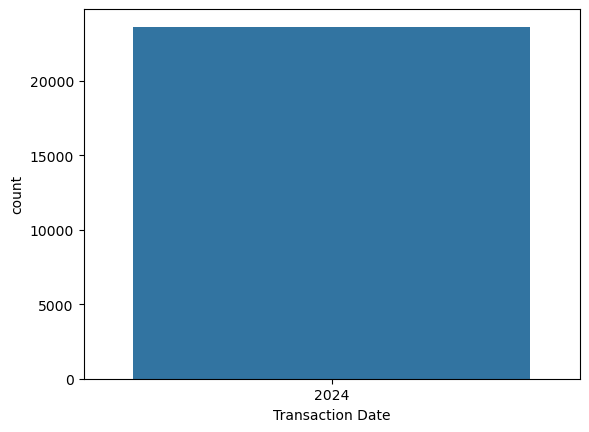

In [34]:
sns.countplot(x="Transaction Date",data=fraud_data)   #this is the data releated to 2024

<Axes: xlabel='Customer Location', ylabel='count'>

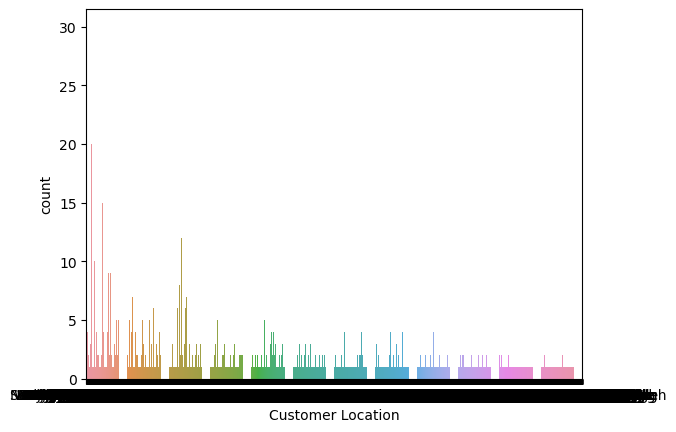

In [35]:
sns.countplot(x="Customer Location",data=fraud_data)   

In [36]:
fraud_data["Customer Location"].value_counts()

Customer Location
North Michael       30
East Michael        24
West Christopher    21
East David          20
Lake Michael        20
                    ..
Turnershire          1
North Robertberg     1
West Jacobhaven      1
New Stephenshire     1
Holtport             1
Name: count, Length: 14868, dtype: int64

In [37]:
import requests

# IP address to look up
ip_address = '192.168.1.109'

# Request geolocation data
response = requests.get(f'https://ipinfo.io/{ip_address}/json')
data = response.json()

data

{'ip': '192.168.1.109', 'bogon': True}

In [39]:
fraud_data[fraud_data["Shipping Address"]==fraud_data["Billing Address"]]

Transaction ID  \
0      c12e07a0-8a06-4c0d-b5cc-04f3af688570   
1      7d187603-7961-4fce-9827-9698e2b6a201   
3      e9949bfa-194d-486b-84da-9565fca9e5ce   
4      7362837c-7538-434e-8731-0df713f5f26d   
5      5da506fe-d4df-474a-b773-146333f06cfe   
...                                     ...   
23629  d8b7171f-bdd9-479c-b98b-396c621aebfe   
23630  0fd12cf3-c641-4499-8de1-15dc4555cb0c   
23631  649680d3-a684-44cb-95bf-9b454c3aa86d   
23632  c10dbb08-28fc-4ec1-9850-d4e98d2b9640   
23633  23e3c107-f2fc-48c2-abbc-7b809bf6f102   

                                Customer ID  Transaction Amount  \
0      8ca9f102-02a4-4207-ab63-484e83a1bdf0               42.32   
1      4d158416-caae-4b09-bd5b-15235deb9129              301.34   
3      b04960c0-aeee-4907-b1cd-4819016adcef               95.77   
4      de9d6351-b3a7-4bc7-9a55-8f013eb66928               77.45   
5      03033baf-2bcc-4608-b5b8-9c86976f4948              345.27   
...                                     ...                 ...   
23629  98a3d94c-dc9a-4525-b273-e6ffe54cc5a4               53.73   
23630  b3429f52-8b27-46b5-914c-4accd989edb4               47.42   
23631  066e25c9-4420-4224-bc3f-1a462708090e             1045.23   
23632  cde96e9c-f562-4b8c-8fa8-f356f474232b               34.25   
23633  d8d7a64e-8419-4421-910a-a7cf709a900b               85.03   

       Transaction Date Payment Method Product Category  Quantity  \
0                  2024         PayPal      electronics         1   
1                  2024    credit card      electronics         3   
3                  2024    credit card      electronics         5   
4                  2024    credit card         clothing         5   
5                  2024         PayPal     toys & games         1   
...                 ...            ...              ...       ...   
23629              2024         PayPal     toys & games         5   
23630              2024    credit card         clothing         4   
23631              2024  bank transfer  health & beauty         1   
23632              2024     debit card    home & garden         2   
23633              2024    credit card         clothing         4   

       Customer Age    Customer Location Device Used       IP Address  \
0                40      East Jameshaven     desktop    110.87.246.85   
1                35             Kingstad      tablet    14.73.104.153   
3                45           Kaylaville      mobile  202.122.126.216   
4                42  North Edwardborough     desktop     96.77.232.76   
5                 9         Johnsonmouth     desktop   158.48.161.135   
...             ...                  ...         ...              ...   
23629            32          Rebeccafurt      tablet   173.97.197.128   
23630            41          Nataliefort     desktop    133.222.22.48   
23631             9    East Shannonville      tablet  206.133.237.168   
23632            39          Lake Nicole      mobile   16.204.137.130   
23633            38             Holtport      tablet  116.188.254.162   

                                        Shipping Address  \
0      5399 Rachel Stravenue Suite 718\nNorth Blakebu...   
1            5230 Stephanie Forge\nCollinsbury, PR 81853   
3             7609 Cynthia Square\nWest Brenda, NV 23016   
4      2494 Robert Ramp Suite 313\nRobinsonport, AS 5...   
5                       PSC 3832, Box 5265\nAPO AE 85694   
...                                                  ...   
23629                         USNV Clayton\nFPO AE 82639   
23630  9288 Patricia Cape Apt. 527\nMelissaton, IL 38543   
23631  3015 Elizabeth Summit Suite 819\nEast Joelfort...   
23632             531 Brittany Pike\nNew Stacy, OR 87952   
23633           289 Adams Wells\nWest Joeltown, LA 69190   

                                         Billing Address  Is Fraudulent  \
0      5399 Rachel Stravenue Suite 718\nNorth Blakebu...              0   
1            5230 Stephanie Forge\nCollinsbury, PR 81853              0   
3      

In [ ]:
fraud_data

In [ ]:
#ONly 2342 people in data have different billing and shipping address

In [ ]:
shipping_billing_different=fraud_data[fraud_data["Shipping Address"]!=fraud_data["Billing Address"]]
shipping_billing_different

In [ ]:
shipping_billing_different[shipping_billing_different["Is Fraudulent"]==1]

In [ ]:
#Credit card trans have more fraud trans  so to mitigate that 3-d secure and strong customer authentication is implemented in our product

In [ ]:
import re
def extract_pincode(address):
    match = re.search(r'\d{5,}', address)
    if match:
        return match.group()
    else:
        return None

In [ ]:
fraud_data["Shipping Pincode"]=fraud_data["Shipping Address"].apply(extract_pincode)

In [ ]:
fraud_data["Billing Pincode"]=fraud_data["Billing Address"].apply(extract_pincode)

In [ ]:
fraud_data

In [ ]:
import ipaddress
fraud_data['IP Address'] = fraud_data['IP Address'].apply(lambda x: int(ipaddress.IPv4Address(x)))


In [ ]:
fraud_data.info()

In [ ]:
#Now drop Transcation Id,customerId,customer loaction,Shipping address,billing address from fraud_data table

In [ ]:
fraud_data.drop(columns=["Transaction ID","Customer ID","Customer Location","Shipping Address","Billing Address"],axis=1,inplace=True)

In [ ]:
fraud_data.info()

In [ ]:
#Lets convert shipping pincode and billing pincode to interger format

In [ ]:
fraud_data["Shipping Pincode"]=fraud_data["Shipping Pincode"].astype(int)

In [ ]:
fraud_data["Billing Pincode"]=fraud_data["Billing Pincode"].astype(int)
fraud_data["Transaction Date"]=fraud_data["Transaction Date"].astype(int)

In [ ]:
fraud_data.info()

In [ ]:
#Now convert payment method,product category,mobile used categorical cols to numeric columns (as we have very less unqiue columsn on all 3 columns its good to do lable or one hot encoding)

In [40]:
#label encoding
le=LabelEncoder()
for i in fraud_data:
    if(fraud_data[i].dtype=="object"):
        fraud_data[i]=le.fit_transform(fraud_data[i])


In [41]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  int32  
 1   Customer ID         23634 non-null  int32  
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  int32  
 4   Payment Method      23634 non-null  int32  
 5   Product Category    23634 non-null  int32  
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  int32  
 9   Device Used         23634 non-null  int32  
 10  IP Address          23634 non-null  int32  
 11  Shipping Address    23634 non-null  int32  
 12  Billing Address     23634 non-null  int32  
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [42]:
#Now our dataset has all numeric columns..we reduced 16 to 13 columns

In [43]:
#Lets find correlation now
fraud_correlation=fraud_data.corr()
fraud_correlation

Transaction ID  Customer ID  Transaction Amount  \
Transaction ID            1.000000     0.012715           -0.006237   
Customer ID               0.012715     1.000000            0.005750   
Transaction Amount       -0.006237     0.005750            1.000000   
Transaction Date               NaN          NaN                 NaN   
Payment Method            0.017343     0.003025           -0.006721   
Product Category          0.001668    -0.010382            0.003096   
Quantity                  0.003709     0.002936            0.008426   
Customer Age              0.003800     0.003364           -0.008015   
Customer Location        -0.007524     0.012549           -0.001131   
Device Used               0.001258    -0.002140            0.003717   
IP Address                0.000871     0.000722            0.006717   
Shipping Address         -0.015805    -0.009862            0.002555   
Billing Address          -0.014586    -0.006906            0.004402   
Is Fraudulent            -0.011216     0.002964            0.275459   
Account Age Days         -0.008935     0.005317           -0.044580   
Transaction Hour         -0.004251     0.000042           -0.028962   

                    Transaction Date  Payment Method  Product Category  \
Transaction ID                   NaN        0.017343          0.001668   
Customer ID                      NaN        0.003025         -0.010382   
Transaction Amount               NaN       -0.006721          0.003096   
Transaction Date                 NaN             NaN               NaN   
Payment Method                   NaN        1.000000          0.002607   
Product Category                 NaN        0.002607          1.000000   
Quantity                         NaN       -0.002225         -0.000781   
Customer Age                     NaN        0.003534          0.005411   
Customer Location                NaN       -0.012369          0.005955   
Device Used                      NaN        0.007868          0.001957   
IP Address                       NaN        0.005334          0.006448   
Shipping Address                 NaN        0.001392         -0.002984   
Billing Address                  NaN        0.009730         -0.006001   
Is Fraudulent                    NaN       -0.009516         -0.004618   
Account Age Days                 NaN       -0.008083         -0.003994   
Transaction Hour                 NaN        0.000525          0.009737   

                    Quantity  Customer Age  Customer Location  Device Used  \
Transaction ID      0.003709      0.003800          -0.007524     0.001258   
Customer ID         0.002936      0.003364           0.012549    -0.002140   
Transaction Amount  0.008426     -0.008015          -0.001131     0.003717   
Transaction Date         NaN           NaN                NaN          NaN   
Payment Method     -0.002225      0.003534          -0.012369     0.007868   
Product Category   -0.000781      0.005411           0.005955     0.001957   
Quantity            1.000000     -0.000445           0.008418    -0.007300   
Customer Age       -0.000445      1.000000           0.001436     0.001145   
Customer Location   0.008418      0.001436           1.000000    -0.003034   
Device Used        -0.007300      0.001145          -0.003034     1.000000   
IP Address         -0.001184     -0.001645          -0.002448     0.008948   
Shipping Address    0.005645     -0.006415           0.008103    -0.005829   
Billing Address     0.002388     -0.009532           0.007352    -0.006726   
Is Fraudulent      -0.005340      0.004819          -0.001801    -0.003322   
Account Age Days   -0.004549     -0.012201           0.000675    -0.007293   
Transaction Hour    0.004059      0.003518           0.006667     0.007786   

                    IP Address  Shipping Address  Billing Address  \
Transaction ID        0.000871         -0.015805        -0.014586   
Customer ID           0.000722         -0.009862        -0.006906   
Transaction Amount 

<Axes: >

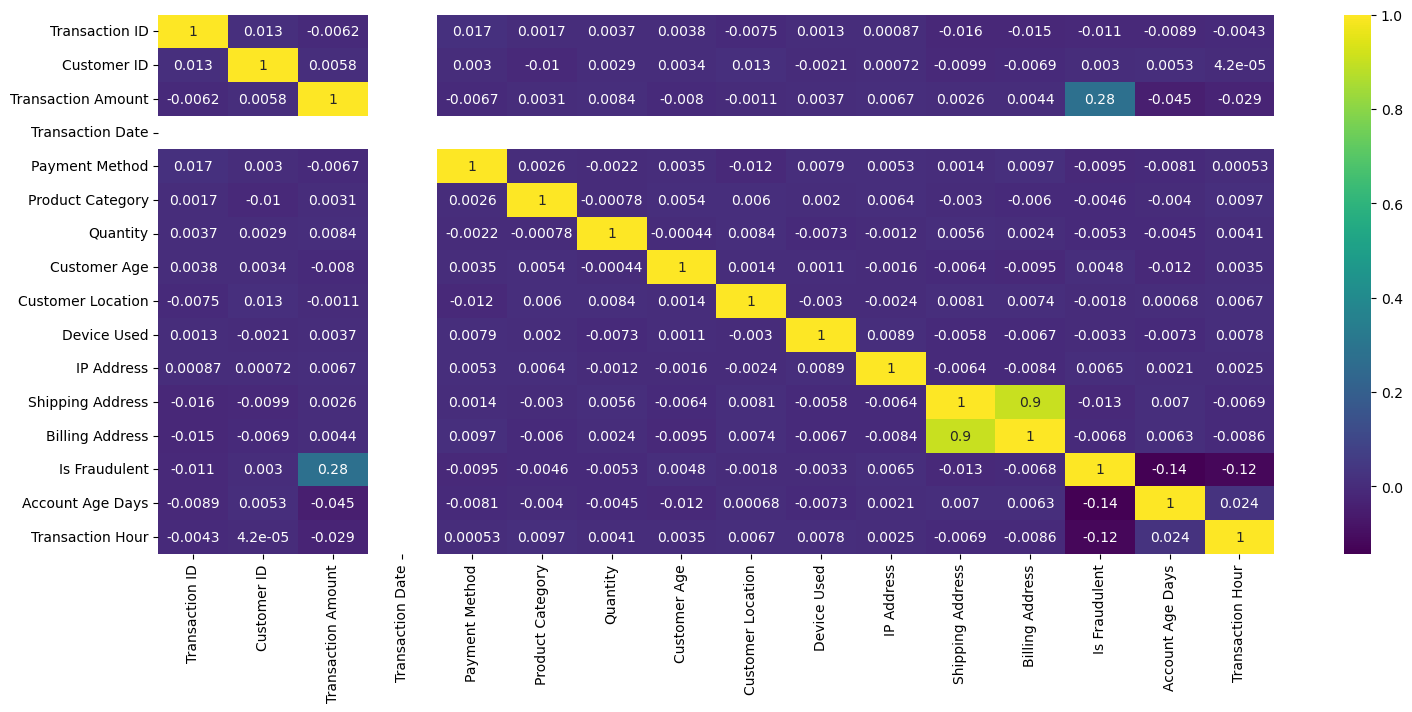

In [44]:
#lets see above correlation in heatmap using seaborn library
plt.figure(figsize=(18,7))
sns.heatmap(fraud_correlation,cmap="viridis",annot=True)

In [45]:
#by seeing above heatmap we can undertand except transaction amount we dont have much correlation with any of other columns.Pur analysis is coreect

In [46]:
fraud_data

Transaction ID  Customer ID  Transaction Amount  Transaction Date  \
0               17820        12976               42.32              2024   
1               11524         7073              301.34              2024   
2               22405        18853              340.32              2024   
3               21537        16242               95.77              2024   
4               10635        20561               77.45              2024   
...               ...          ...                 ...               ...   
23629           19986        14049               53.73              2024   
23630            1456        16505               47.42              2024   
23631            9289          604             1045.23              2024   
23632           17807        18964               34.25              2024   
23633            3309        20045               85.03              2024   

       Payment Method  Product Category  Quantity  Customer Age  \
0                   0                 1         1            40   
1                   2                 1         3            35   
2                   3                 4         5            29   
3                   2                 1         5            45   
4                   2                 0         5            42   
...               ...               ...       ...           ...   
23629               0                 4         5            32   
23630               2                 0         4            41   
23631               1                 2         1             9   
23632               3                 3         2            39   
23633               2                 0         4            38   

       Customer Location  Device Used  IP Address  Shipping Address  \
0                   2447            0        1463             11340   
1                   5019            2        4809             10955   
2                   9243            0       19830              4100   
3                   4873            1       12142             16098   
4                   8701            0       23294              5214   
...                  ...          ...         ...               ...   
23629              10986            2        8704             22391   
23630               7171            0        4030             19579   
23631               2964            2       12576              6293   
23632               5891            1        7067             11119   
23633               4158            2        2037              6064   

       Billing Address  Is Fraudulent  Account Age Days  Transaction Hour  
0                11357              0               282                23  
1                10967              0               223                 0  
2                 9999              0               360                 8  
3                16105              0               325                20  
4                 5207              0               116                15  
...                ...            ...               ...               ...  
23629            22381              0               363                16  
23630            19562              0               296                17  
23631             6300              0               329                23  
23632            11131              0               347                11  
23633             6061              0               203                 2  

[23634 rows x 16 columns]

In [47]:
fraud_data.isna().sum()  #as transcation_date has same values for all thorughout the column we dont have varibality in the column so corrlwtion isnone wirth otehr columns

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

<Axes: >

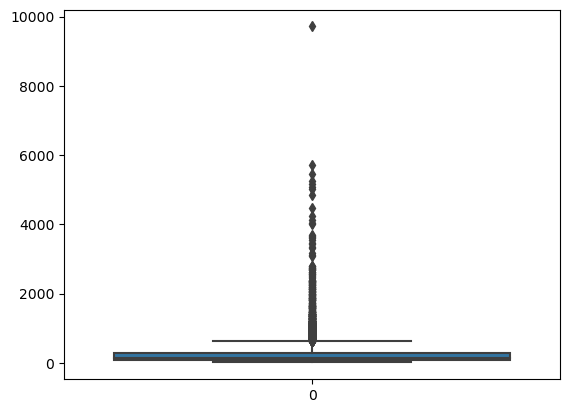

In [48]:
sns.boxplot(fraud_data["Transaction Amount"])  #ouliers are there but they are useful

In [49]:
#Lets train our data with logistic rgression as this algorithm most suitable for binary classification and check the classification report

In [50]:
x=fraud_data.drop(columns=["Is Fraudulent"])
y=fraud_data["Is Fraudulent"]
lr=LogisticRegression();
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)
model=lr.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("train prediction accauracy score is",y_train_score)
print("test prediction accauracy score is",y_test_score)

#very good accaurcy we got by training our data with logostic regression model

train prediction accauracy score is 0.9519754588247739
test prediction accauracy score is 0.9593822720541569


E:\anacondafolder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
#classfication report
train_classification_report=classification_report(y_train,y_pred_train)
test_classification_report=classification_report(y_test,y_pred_test)
print("train classification report")
print("\n")
print(train_classification_report)
print("********************************************************************")
print("test classification report")
print("\n")
print(test_classification_report)

NameError: name 'y_train' is not defined

In [ ]:
#Confusion matrix
fraud_test_confusion_matrix=confusion_matrix(y_test,y_pred_test)
fraud_train_confusion_matrix=confusion_matrix(y_train,y_pred_train)
print("fraud_train_confusion_matrix")
print(fraud_train_confusion_matrix)
print("fraud_test_confusion_matrix")
print(fraud_test_confusion_matrix)

In [ ]:
#so by above analysis and reports we can understand that oir model is not detecting fraud_transcations  corrcetly 
# Reason may be-Imbalanced data

In [ ]:
#Lets train our model using on of ensemble bagging technique which is random forest to conform the above analsyis
rf=RandomForestClassifier()
model=rf.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("training score is",y_train_score)
print("testing score is",y_test_score)

In [ ]:
#Lets generate classification report
#classfication report
train_classification_report=classification_report(y_train,y_pred_train)
test_classification_report=classification_report(y_test,y_pred_test)
print("train classification report")
print("\n")
print(train_classification_report)
print("********************************************************************")
print("test classification report")
print("\n")
print(test_classification_report)

In [ ]:
#Confusion matrix
fraud_test_confusion_matrix=confusion_matrix(y_test,y_pred_test)
fraud_train_confusion_matrix=confusion_matrix(y_train,y_pred_train)
print("fraud_train_confusion_matrix")
print(fraud_train_confusion_matrix)
print("fraud_test_confusion_matrix")
print(fraud_test_confusion_matrix)

In [ ]:
#lets assign more weight to minoirty class so that model give high prioroty to minority class
class_weights = {0: 1, 1: 3}
rf = RandomForestClassifier(class_weight=class_weights)
model=rf.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("training score is",y_train_score)
print("testing score is",y_test_score)

In [ ]:
#Confusion matrix
fraud_test_confusion_matrix=confusion_matrix(y_test,y_pred_test)
fraud_train_confusion_matrix=confusion_matrix(y_train,y_pred_train)
print("fraud_train_confusion_matrix")
print(fraud_train_confusion_matrix)
print("fraud_test_confusion_matrix")
print(fraud_test_confusion_matrix)

In [ ]:
#lets assign more weight to minoirty class so that model give high prioroty to minority class
rf = RandomForestClassifier(class_weight="balanced")
model=rf.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("training score is",y_train_score)
print("testing score is",y_test_score)

In [ ]:
#Confusion matrix
fraud_test_confusion_matrix=confusion_matrix(y_test,y_pred_test)
fraud_train_confusion_matrix=confusion_matrix(y_train,y_pred_train)
print("fraud_train_confusion_matrix")
print(fraud_train_confusion_matrix)
print("fraud_test_confusion_matrix")
print(fraud_test_confusion_matrix)

In [ ]:
#performance is not increasing even assigning more wieghts to minority class

In [ ]:
#analysis
#So compared with logistic regression random forest is good in handling imbalanced data it seems

### Lets do undersampling we will gte approx 2500 records and train the model using that data

In [ ]:
pip show imbalanced-learn

In [ ]:
pip install --upgrade scikit-learn imbalanced-learn

In [51]:
from imblearn.under_sampling import RandomUnderSampler

In [52]:
help(RandomUnderSampler)

Help on class RandomUnderSampler in module imblearn.under_sampling._prototype_selection._random_under_sampler:

class RandomUnderSampler(imblearn.under_sampling.base.BaseUnderSampler)
 |  RandomUnderSampler(*, sampling_strategy='auto', random_state=None, replacement=False)
 |  
 |  Class to perform random under-sampling.
 |  
 |  Under-sample the majority class(es) by randomly picking samples
 |  with or without replacement.
 |  
 |  Read more in the :ref:`User Guide <controlled_under_sampling>`.
 |  
 |  Parameters
 |  ----------
 |  sampling_strategy : float, str, dict, callable, default='auto'
 |      Sampling information to sample the data set.
 |  
 |      - When ``float``, it corresponds to the desired ratio of the number of
 |        samples in the minority class over the number of samples in the
 |        majority class after resampling. Therefore, the ratio is expressed as
 |        :math:`\alpha_{us} = N_{m} / N_{rM}` where :math:`N_{m}` is the
 |        number of samples in 

In [105]:
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x,y)
lr=LogisticRegression();
x_train,x_test,y_train,y_test=train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=23)
model=lr.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("train prediction accauracy score is",y_train_score)
print("test prediction accauracy score is",y_test_score)


train prediction accauracy score is 0.69769820971867
test prediction accauracy score is 0.6973415132924335


E:\anacondafolder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
#Lets generate classification report
#classfication report
train_classification_report=classification_report(y_train,y_pred_train)
test_classification_report=classification_report(y_test,y_pred_test)
print("train classification report")
print("\n")
print(train_classification_report)
print("********************************************************************")
print("test classification report")
print("\n")
print(test_classification_report)

train classification report


              precision    recall  f1-score   support

           0       0.69      0.73      0.71       990
           1       0.71      0.66      0.68       965

    accuracy                           0.70      1955
   macro avg       0.70      0.70      0.70      1955
weighted avg       0.70      0.70      0.70      1955

********************************************************************
test classification report


              precision    recall  f1-score   support

           0       0.65      0.78      0.71       232
           1       0.76      0.62      0.68       257

    accuracy                           0.70       489
   macro avg       0.71      0.70      0.70       489
weighted avg       0.71      0.70      0.70       489



In [54]:
#Confusion matrix
fraud_test_confusion_matrix=confusion_matrix(y_test,y_pred_test)
fraud_train_confusion_matrix=confusion_matrix(y_train,y_pred_train)
print("fraud_train_confusion_matrix")
print(fraud_train_confusion_matrix)
print("fraud_test_confusion_matrix")
print(fraud_test_confusion_matrix)

#So by using undersampling we reduced the samples of majority class beacuse of model not able to rpeodtc majority class properly.So accuarcy dropped

fraud_train_confusion_matrix
[[723 267]
 [324 641]]
fraud_test_confusion_matrix
[[182  50]
 [ 98 159]]


In [58]:
#Lets do oversampling for the dataset so the minority class samples=majoroty class samples
#so apporx we will get 46k samples of data

In [59]:
#Importing oversampler
from imblearn.over_sampling import RandomOverSampler

In [62]:
ros=RandomOverSampler(random_state=42)
x_resampled,y_resampled=ros.fit_resample(x,y)

In [66]:
lr=LogisticRegression();
x_train,x_test,y_train,y_test=train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=23)
model=lr.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("train prediction accauracy score is",y_train_score)
print("test prediction accauracy score is",y_test_score)


train prediction accauracy score is 0.7038400401572827
test prediction accauracy score is 0.7107640825432237


E:\anacondafolder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
#Lets generate classification report
#classfication report
train_classification_report=classification_report(y_train,y_pred_train)
test_classification_report=classification_report(y_test,y_pred_test)
print("train classification report")
print("\n")
print(train_classification_report)
print("********************************************************************")
print("test classification report")
print("\n")
print(test_classification_report)

train classification report


              precision    recall  f1-score   support

           0       0.69      0.73      0.71     17941
           1       0.72      0.68      0.70     17918

    accuracy                           0.70     35859
   macro avg       0.70      0.70      0.70     35859
weighted avg       0.70      0.70      0.70     35859

********************************************************************
test classification report


              precision    recall  f1-score   support

           0       0.70      0.74      0.72      4471
           1       0.72      0.68      0.70      4494

    accuracy                           0.71      8965
   macro avg       0.71      0.71      0.71      8965
weighted avg       0.71      0.71      0.71      8965



In [68]:
#Confusion matrix
fraud_test_confusion_matrix=confusion_matrix(y_test,y_pred_test)
fraud_train_confusion_matrix=confusion_matrix(y_train,y_pred_train)
print("fraud_train_confusion_matrix")
print(fraud_train_confusion_matrix)
print("fraud_test_confusion_matrix")
print(fraud_test_confusion_matrix)

#So by using undersampling we reduced the samples of majority class beacuse of model not able to rpeodtc majority class properly.So accuarcy dropped

fraud_train_confusion_matrix
[[13138  4803]
 [ 5817 12101]]
fraud_test_confusion_matrix
[[3294 1177]
 [1416 3078]]


In [69]:
#Lets apply smote technique (making imbalanced to balanced dataset)-synthetic minority over-sampling technique

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
sm=SMOTE(random_state=42)

In [73]:
x_resampled,y_resampled=sm.fit_resample(x,y)

In [75]:
lr=LogisticRegression();
x_train,x_test,y_train,y_test=train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=23)
model=lr.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("train prediction accauracy score is",y_train_score)
print("test prediction accauracy score is",y_test_score)

train prediction accauracy score is 0.716528626007418
test prediction accauracy score is 0.7258226436140547


E:\anacondafolder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
from imblearn.pipeline import Pipeline
# Create a pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('under', RandomUnderSampler(random_state=42))
])

X_resampled, y_resampled = pipeline.fit_resample(x,y)
lr=LogisticRegression();
x_train,x_test,y_train,y_test=train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=23)
model=lr.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("train prediction accauracy score is",y_train_score)
print("test prediction accauracy score is",y_test_score)

train prediction accauracy score is 0.7052065032488357
test prediction accauracy score is 0.7176798661461238


E:\anacondafolder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
#Lets apply randomforest alogorithm with smote

In [85]:
X_resampled, y_resampled = pipeline.fit_resample(x,y)
rf=RandomForestClassifier(class_weight="balanced")
x_train,x_test,y_train,y_test=train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=23)
model=rf.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("train prediction accauracy score is",y_train_score)
print("test prediction accauracy score is",y_test_score)

train prediction accauracy score is 0.9999442259962631
test prediction accauracy score is 0.8858895705521472


In [86]:
#Lets generate classification report
#classfication report
train_classification_report=classification_report(y_train,y_pred_train)
test_classification_report=classification_report(y_test,y_pred_test)
print("train classification report")
print("\n")
print(train_classification_report)
print("********************************************************************")
print("test classification report")
print("\n")
print(test_classification_report)

train classification report


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17944
           1       1.00      1.00      1.00     17915

    accuracy                           1.00     35859
   macro avg       1.00      1.00      1.00     35859
weighted avg       1.00      1.00      1.00     35859

********************************************************************
test classification report


              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4468
           1       0.87      0.91      0.89      4497

    accuracy                           0.89      8965
   macro avg       0.89      0.89      0.89      8965
weighted avg       0.89      0.89      0.89      8965



In [87]:
#Confusion matrix
fraud_test_confusion_matrix=confusion_matrix(y_test,y_pred_test)
fraud_train_confusion_matrix=confusion_matrix(y_train,y_pred_train)
print("fraud_train_confusion_matrix")
print(fraud_train_confusion_matrix)
print("fraud_test_confusion_matrix")
print(fraud_test_confusion_matrix)

#So by using undersampling we reduced the samples of majority class beacuse of model not able to rpeodtc majority class properly.So accuarcy dropped

fraud_train_confusion_matrix
[[17943     1]
 [    1 17914]]
fraud_test_confusion_matrix
[[3872  596]
 [ 427 4070]]


In [88]:
#Normal smote
X_resampled, y_resampled = sm.fit_resample(x,y)
rf=RandomForestClassifier(class_weight="balanced")
x_train,x_test,y_train,y_test=train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=23)
model=rf.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("train prediction accauracy score is",y_train_score)
print("test prediction accauracy score is",y_test_score)



train prediction accauracy score is 1.0
test prediction accauracy score is 0.9205800334634691


In [95]:
#Lets generate classification report
#classfication report
train_classification_report=classification_report(y_train,y_pred_train)
test_classification_report=classification_report(y_test,y_pred_test)
print("train classification report")
print("\n")
print(train_classification_report)
print("********************************************************************")
print("test classification report")
print("\n")
print(test_classification_report)

#Confusion matrix
fraud_test_confusion_matrix=confusion_matrix(y_test,y_pred_test)
fraud_train_confusion_matrix=confusion_matrix(y_train,y_pred_train)
print("fraud_train_confusion_matrix")
print(fraud_train_confusion_matrix)
print("fraud_test_confusion_matrix")
print(fraud_test_confusion_matrix)

#So by using undersampling we reduced the samples of majority class beacuse of model not able to rpeodtc majority class properly.So accuarcy dropped

train classification report


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17941
           1       1.00      1.00      1.00     17918

    accuracy                           1.00     35859
   macro avg       1.00      1.00      1.00     35859
weighted avg       1.00      1.00      1.00     35859

********************************************************************
test classification report


              precision    recall  f1-score   support

           0       0.94      0.89      0.92      4471
           1       0.90      0.95      0.92      4494

    accuracy                           0.92      8965
   macro avg       0.92      0.92      0.92      8965
weighted avg       0.92      0.92      0.92      8965

fraud_train_confusion_matrix
[[17941     0]
 [    0 17918]]
fraud_test_confusion_matrix
[[3997  474]
 [ 238 4256]]


In [96]:
#just oversampling

In [98]:
X_resampled, y_resampled = ros.fit_resample(x,y)
rf=RandomForestClassifier(class_weight="balanced")
x_train,x_test,y_train,y_test=train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=23)
model=rf.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("train prediction accauracy score is",y_train_score)
print("test prediction accauracy score is",y_test_score)



train prediction accauracy score is 1.0
test prediction accauracy score is 0.9229224762967094


In [99]:
#Lets generate classification report
#classfication report
train_classification_report=classification_report(y_train,y_pred_train)
test_classification_report=classification_report(y_test,y_pred_test)
print("train classification report")
print("\n")
print(train_classification_report)
print("********************************************************************")
print("test classification report")
print("\n")
print(test_classification_report)

#Confusion matrix
fraud_test_confusion_matrix=confusion_matrix(y_test,y_pred_test)
fraud_train_confusion_matrix=confusion_matrix(y_train,y_pred_train)
print("fraud_train_confusion_matrix")
print(fraud_train_confusion_matrix)
print("fraud_test_confusion_matrix")
print(fraud_test_confusion_matrix)

#So by using undersampling we reduced the samples of majority class beacuse of model not able to rpeodtc majority class properly.So accuarcy dropped

train classification report


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17941
           1       1.00      1.00      1.00     17918

    accuracy                           1.00     35859
   macro avg       1.00      1.00      1.00     35859
weighted avg       1.00      1.00      1.00     35859

********************************************************************
test classification report


              precision    recall  f1-score   support

           0       0.95      0.90      0.92      4471
           1       0.90      0.95      0.93      4494

    accuracy                           0.92      8965
   macro avg       0.92      0.92      0.92      8965
weighted avg       0.92      0.92      0.92      8965

fraud_train_confusion_matrix
[[17941     0]
 [    0 17918]]
fraud_test_confusion_matrix
[[4008  463]
 [ 228 4266]]


In [100]:
#So with oversampling and smote we got good recall and precision so the model is good in indentifying the fraud transcations

In [101]:
help(RandomUnderSampler)

Help on class RandomUnderSampler in module imblearn.under_sampling._prototype_selection._random_under_sampler:

class RandomUnderSampler(imblearn.under_sampling.base.BaseUnderSampler)
 |  RandomUnderSampler(*, sampling_strategy='auto', random_state=None, replacement=False)
 |  
 |  Class to perform random under-sampling.
 |  
 |  Under-sample the majority class(es) by randomly picking samples
 |  with or without replacement.
 |  
 |  Read more in the :ref:`User Guide <controlled_under_sampling>`.
 |  
 |  Parameters
 |  ----------
 |  sampling_strategy : float, str, dict, callable, default='auto'
 |      Sampling information to sample the data set.
 |  
 |      - When ``float``, it corresponds to the desired ratio of the number of
 |        samples in the minority class over the number of samples in the
 |        majority class after resampling. Therefore, the ratio is expressed as
 |        :math:`\alpha_{us} = N_{m} / N_{rM}` where :math:`N_{m}` is the
 |        number of samples in 

In [102]:
rus=RandomUnderSampler()

In [107]:
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=23)
model=rf.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("train prediction accauracy score is",y_train_score)
print("test prediction accauracy score is",y_test_score)


train prediction accauracy score is 1.0
test prediction accauracy score is 0.7137014314928425


In [115]:
#Lets use balancedrandomforestclassifier
brfc=BalancedRandomForestClassifier()
model=brfc.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("train prediction accauracy score is",y_train_score)
print("test prediction accauracy score is",y_test_score)

E:\anacondafolder\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
E:\anacondafolder\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
E:\anacondafolder\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


train prediction accauracy score is 1.0
test prediction accauracy score is 0.7137014314928425


In [116]:
#Lets generate classification report
#classfication report
train_classification_report=classification_report(y_train,y_pred_train)
test_classification_report=classification_report(y_test,y_pred_test)
print("train classification report")
print("\n")
print(train_classification_report)
print("********************************************************************")
print("test classification report")
print("\n")
print(test_classification_report)

#Confusion matrix
fraud_test_confusion_matrix=confusion_matrix(y_test,y_pred_test)
fraud_train_confusion_matrix=confusion_matrix(y_train,y_pred_train)
print("fraud_train_confusion_matrix")
print(fraud_train_confusion_matrix)
print("fraud_test_confusion_matrix")
print(fraud_test_confusion_matrix)

#So by using undersampling we reduced the samples of majority class beacuse of model not able to rpeodtc majority class properly.So accuarcy dropped

train classification report


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00       965

    accuracy                           1.00      1955
   macro avg       1.00      1.00      1.00      1955
weighted avg       1.00      1.00      1.00      1955

********************************************************************
test classification report


              precision    recall  f1-score   support

           0       0.68      0.76      0.72       232
           1       0.76      0.67      0.71       257

    accuracy                           0.71       489
   macro avg       0.72      0.72      0.71       489
weighted avg       0.72      0.71      0.71       489

fraud_train_confusion_matrix
[[990   0]
 [  0 965]]
fraud_test_confusion_matrix
[[176  56]
 [ 84 173]]


In [ ]:
#lets try the classification using boosting algorithm

In [133]:
model=xgb.XGBClassifier(scale_pos_weight=10,random_state=45)


In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)
model=model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("train prediction accauracy score is",y_train_score)
print("test prediction accauracy score is",y_test_score)

train prediction accauracy score is 0.9905326069709631
test prediction accauracy score is 0.9394965094140046


In [135]:
#Lets generate classification report
#classfication report
train_classification_report=classification_report(y_train,y_pred_train)
test_classification_report=classification_report(y_test,y_pred_test)
print("train classification report")
print("\n")
print(train_classification_report)
print("********************************************************************")
print("test classification report")
print("\n")
print(test_classification_report)

#Confusion matrix
fraud_test_confusion_matrix=confusion_matrix(y_test,y_pred_test)
fraud_train_confusion_matrix=confusion_matrix(y_train,y_pred_train)
print("fraud_train_confusion_matrix")
print(fraud_train_confusion_matrix)
print("fraud_test_confusion_matrix")
print(fraud_test_confusion_matrix)

#xgboost also performing good for 0 class not 1 class

train classification report


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17901
           1       0.85      1.00      0.92      1006

    accuracy                           0.99     18907
   macro avg       0.93      0.99      0.96     18907
weighted avg       0.99      0.99      0.99     18907

********************************************************************
test classification report


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4511
           1       0.32      0.30      0.31       216

    accuracy                           0.94      4727
   macro avg       0.64      0.63      0.64      4727
weighted avg       0.94      0.94      0.94      4727

fraud_train_confusion_matrix
[[17724   177]
 [    2  1004]]
fraud_test_confusion_matrix
[[4377  134]
 [ 152   64]]


In [138]:
#lets apply xgboost with smote
x_resampled,y_resampled=sm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=23)
model=xgb.XGBClassifier(scale_pos_weight=10,random_state=45)
model=model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_train_score=accuracy_score(y_train,y_pred_train)
y_test_score=accuracy_score(y_test,y_pred_test)
print("train prediction accauracy score is",y_train_score)
print("test prediction accauracy score is",y_test_score)

train prediction accauracy score is 0.9088095038902367
test prediction accauracy score is 0.8627997769102064


In [139]:
#Lets generate classification report
#classfication report
train_classification_report=classification_report(y_train,y_pred_train)
test_classification_report=classification_report(y_test,y_pred_test)
print("train classification report")
print("\n")
print(train_classification_report)
print("********************************************************************")
print("test classification report")
print("\n")
print(test_classification_report)

#Confusion matrix
fraud_test_confusion_matrix=confusion_matrix(y_test,y_pred_test)
fraud_train_confusion_matrix=confusion_matrix(y_train,y_pred_train)
print("fraud_train_confusion_matrix")
print(fraud_train_confusion_matrix)
print("fraud_test_confusion_matrix")
print(fraud_test_confusion_matrix)

#xgboost also performing good for 0 class not 1 class

train classification report


              precision    recall  f1-score   support

           0       1.00      0.82      0.90     17941
           1       0.85      1.00      0.92     17918

    accuracy                           0.91     35859
   macro avg       0.92      0.91      0.91     35859
weighted avg       0.92      0.91      0.91     35859

********************************************************************
test classification report


              precision    recall  f1-score   support

           0       0.98      0.74      0.84      4471
           1       0.79      0.99      0.88      4494

    accuracy                           0.86      8965
   macro avg       0.89      0.86      0.86      8965
weighted avg       0.89      0.86      0.86      8965

fraud_train_confusion_matrix
[[14671  3270]
 [    0 17918]]
fraud_test_confusion_matrix
[[3294 1177]
 [  53 4441]]


# Conclusion-

##### So using smote technique or oversampling technique with bagging or boosting technique we can get good recall and precision 

#### to handle imbalanced data we can predict whether the transaction  
##### the user/customer is doing fraud or not